<a href="https://colab.research.google.com/github/ahxdali/imdb-sentiment-analysis/blob/main/IMDb_Sentiment_Analysis_AhadAli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Class distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



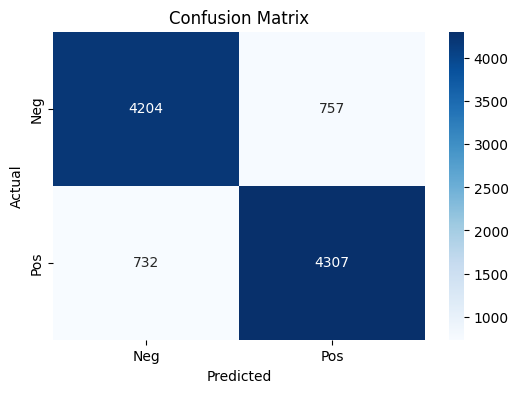

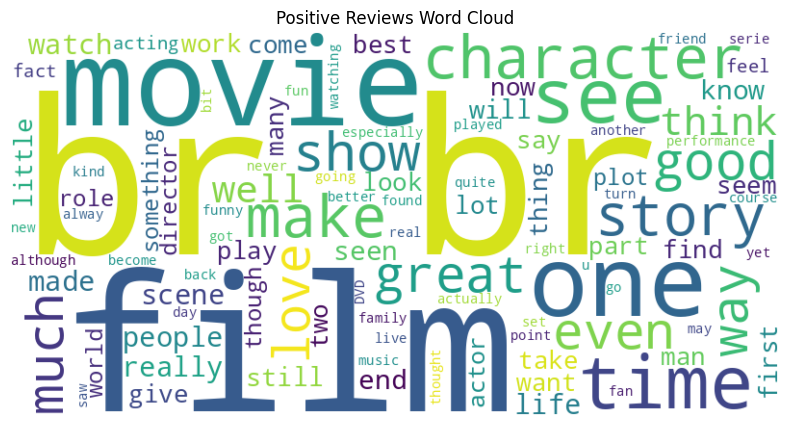

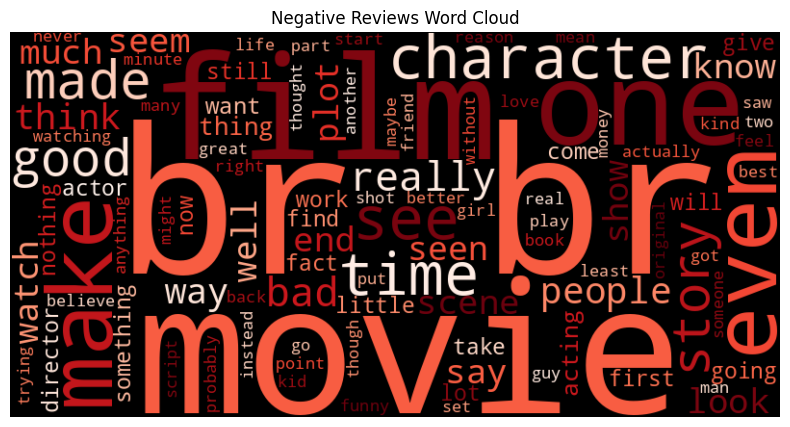

In [7]:
# 📦 Install necessary packages (run this once)
!pip install wordcloud

# 📚 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

# 📄 Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# 🕵️‍♂️ Inspect data
print(df.head())
print("\nClass distribution:\n", df['sentiment'].value_counts())

# 🔄 Convert sentiment labels to binary (positive:1, negative:0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 🧹 Preprocessing: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['review'])
y = df['label']

# 🔀 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Model training
model = MultinomialNB()
model.fit(X_train, y_train)

# 🔍 Predictions and evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 📉 Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Neg','Pos'], yticklabels=['Neg','Pos'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ☁️ Word Clouds for Positive & Negative Reviews
positive_reviews = " ".join(df[df['label'] == 1]['review'])
negative_reviews = " ".join(df[df['label'] == 0]['review'])

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()

# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(negative_reviews)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()

